# Лабораторная работа 3

## Задачи и порядок выполнения работы

1. Получить массив отсчётов исходного сигнала из заранее подготовленного звукового WAV-файла с записанной речью или мелодией длительностью 8−15 с.
2. Построить графики звукового сигнала во временной и частотной области.
3. Добавить высокочастотную шумовую составляющую с прямоугольной функцией спектральной плотности от 10 до 15 кГц и мощностью сопоставимой с мощностью звукового сигнала.
4. Построить графики сигнала во временной и частотной области.
5. Записать полученный сигнал в новый WAV-файл. Прослушать полученный файл средствами операционной системы и сравнить с исходным.
6. Спроектировать цифровой фильтр с конечной импульсной характеристикой.
7. Провести фильтрацию звукового сигнала с помощью полученного цифрового фильтра с конечной импульсной характерстикой.
8. Построить графики сигнала во временной и частотной области.
9. Записать полученный сигнал в новый WAV-файл. Прослушать полученный файл средствами операционной системы и сравнить с исходным.

### 1. Получить массив отсчётов исходного сигнала из заранее подготовленного звукового WAV-файла с записанной речью или мелодией длительностью 8−15 с.

In [1]:
import IPython

IPython.display.Audio(filename='melody.mp3')

In [2]:
import librosa

# sampling rate must be 44100 to reproduce 15 kHz noise 
(data, sampling_rate) = librosa.load('melody.mp3', sr=44100)
print(data, sampling_rate)

[-1.11715775e-02 -1.60001405e-02 -1.52624939e-02 ...  4.46745675e-15
  4.38875002e-15  4.30996410e-15] 44100


### 2. Построить графики звукового сигнала во временной и частотной области.


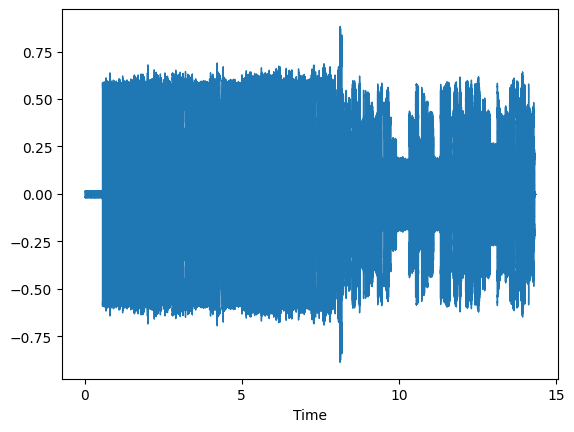

In [3]:
librosa.display.waveshow(data, sr=sampling_rate)

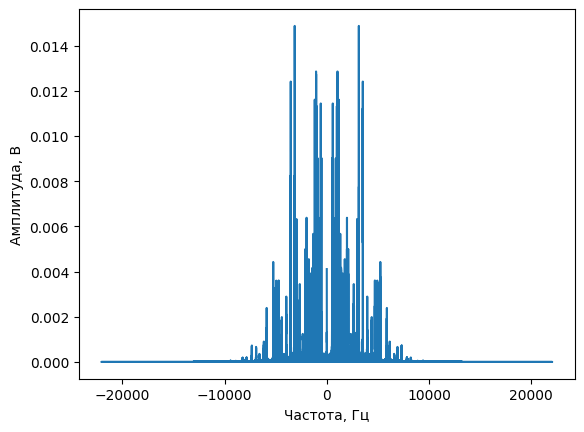

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq

def freq_plot(data: np.ndarray):
    sp = fft(data)
    length = len(data)
    freq = fftfreq(length, 1 / sampling_rate)
    plt.plot(freq, np.abs(sp / length))
    plt.xlabel('Частота, Гц')
    plt.ylabel('Амплитуда, В')

freq_plot(data)

### 3. Добавить высокочастотную шумовую составляющую с прямоугольной функцией спектральной плотности от 10 до 15 кГц и мощностью сопоставимой с мощностью звукового сигнала.

In [5]:
noise_amplitude = 0.020

length = len(data)
noise = np.zeros(length)
time = np.linspace(0, length - 1, length) / sampling_rate
for noise_freq in range(10000, 15000, 50):
    noise += noise_amplitude * np.sin(2 * np.pi * noise_freq * time) # умножаем на data для элемента случайности

print(noise)

[ 0.00000000e+00  1.91634689e+00 -7.36834183e-01 ...  1.96961551e-02
 -1.20317573e-03 -4.86552208e-02]


In [6]:
noisy_signal = data + noise

print(noisy_signal)

[-1.11715775e-02  1.90034674e+00 -7.52096677e-01 ...  1.96961551e-02
 -1.20317573e-03 -4.86552208e-02]


### 4. Построить графики сигнала во временной и частотной области.

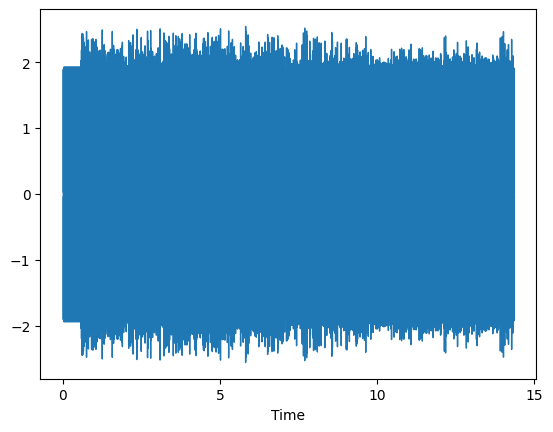

In [7]:
librosa.display.waveshow(noisy_signal, sr=sampling_rate)

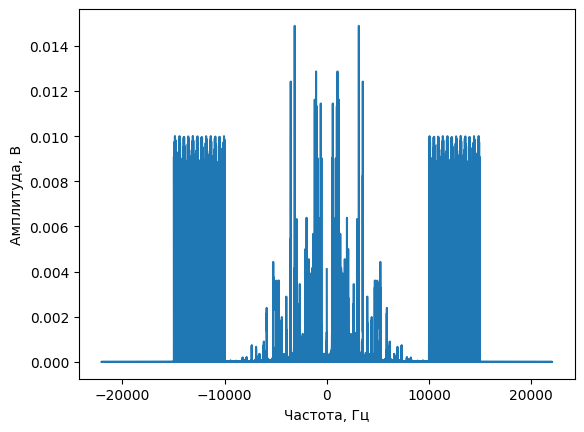

In [8]:
freq_plot(noisy_signal)

### 5. Записать полученный сигнал в новый WAV-файл. Прослушать полученный файл средствами операционной системы и сравнить с исходным.

In [9]:
import soundfile

soundfile.write('noisy_melody.wav', data=noisy_signal, samplerate=sampling_rate)

IPython.display.Audio('noisy_melody.wav')

### 6. Спроектировать цифровой фильтр с конечной импульсной характеристикой.

Воспользуемся веб-приложением для подбора параметров фильтра, например [fiiir.com](fiiir.com)

![](online_redactor.png)

In [13]:
from coefficients import h

print(h)

[ 8.32027024e-03 -1.49618405e-02 -1.83764821e-03  9.89732886e-03
 -1.25024847e-03  1.57971014e-03 -5.40702625e-03 -8.50123680e-03
  1.66072173e-02  4.72058503e-03 -2.02698739e-02  3.22498155e-03
  1.09735340e-02 -2.55207144e-03  2.70330616e-03 -1.08997970e-02
 -6.62017989e-03  2.60035356e-02 -2.58029166e-03 -2.70584787e-02
  1.15670650e-02  1.18095990e-02 -3.59766987e-03  3.48605163e-03
 -2.14923165e-02 -3.21540474e-04  4.30385743e-02 -1.94932703e-02
 -3.92555814e-02  2.99713329e-02  1.32824590e-02 -4.27410320e-03
  2.39391392e-03 -5.48026459e-02  2.74915698e-02  1.08383529e-01
 -1.05333387e-01 -1.10153942e-01  1.90379602e-01  4.75301877e-02
  7.74597592e-01  4.75301877e-02  1.90379602e-01 -1.10153942e-01
 -1.05333387e-01  1.08383529e-01  2.74915698e-02 -5.48026459e-02
  2.39391392e-03 -4.27410320e-03  1.32824590e-02  2.99713329e-02
 -3.92555814e-02 -1.94932703e-02  4.30385743e-02 -3.21540474e-04
 -2.14923165e-02  3.48605163e-03 -3.59766987e-03  1.18095990e-02
  1.15670650e-02 -2.70584

### 7. Провести фильтрацию звукового сигнала с помощью полученного цифрового фильтра с конечной импульсной характерстикой.

In [14]:
filtered = np.convolve(noisy_signal, h)

print(filtered)

[-9.29505438e-05  1.59785458e-02 -3.46698031e-02 ...  2.71290235e-04
  7.17960906e-04 -4.04824585e-04]


### 8. Построить графики сигнала во временной и частотной области.

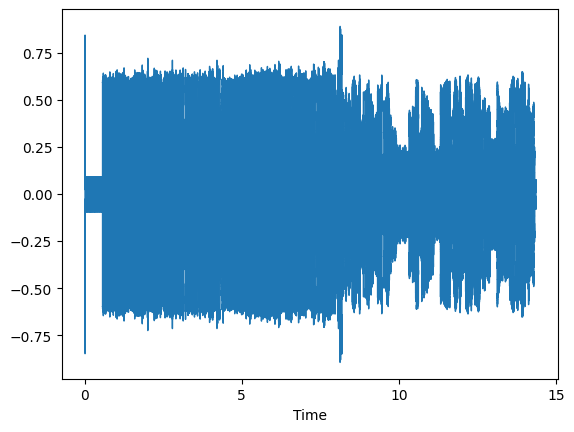

In [15]:
librosa.display.waveshow(filtered, sr=sampling_rate)

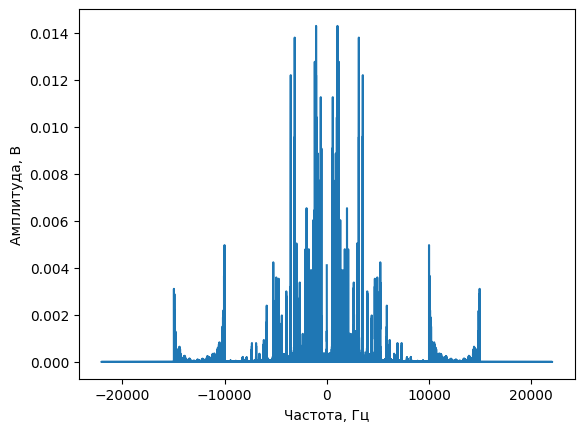

In [16]:
freq_plot(filtered)

### 9. Записать полученный сигнал в новый WAV-файл. Прослушать полученный файл средствами операционной системы и сравнить с исходным.

In [18]:
soundfile.write('filtered_melody.wav', filtered, samplerate=sampling_rate)

IPython.display.Audio('filtered_melody.wav')

## Контрольные вопросы

#### 1. Какими преимуществами и недостатками обладает цифровой фильтр по сравнению с аналоговым?

Преимущества:
- Для изменения цифрового фильтра достаточно поменять ПО или сохранить нужные параметры в ЭВМ. Для изменения аналогового фильтра можно лишь ограниченно подстроить его компоненты, либо менять их на что-то другое
- Возможна более сложная обработка
- Практически исключено влияние помех на сам фильтр

Недостатки:
- Может вызывать задержку сигнала
- Нужен АЦП и ЦАП
- Ограниченность полосы пропускания из-за частоты дискретизации


#### 2. Какие виды фильтров по пропускаемой ими полосе частот вы можете назвать?

- Низкочастотный фильтр (НЧФ): Пропускает частоты ниже определенной граничной частоты и подавляет частоты выше нее.

- Высокочастотный фильтр (ВЧФ): Пропускает частоты выше определенной граничной частоты и подавляет частоты ниже нее.

- Полосовой фильтр (ПФ): Пропускает частоты внутри определенного диапазона (полоса пропускания) и подавляет частоты вне этого диапазона.

- Полосо-заграждающий фильтр (ПЗФ): Подавляет частоты внутри определенного диапазона (полоса заграждения) и пропускает частоты вне этого диапазона.

- Всепропускающий фильтр: Пропускает все частоты, но изменяет фазовые характеристики сигнала.


#### 3. Какие параметры АЧХ фильтра нужно задать при проектировании?

- Граничные частоты
- Ширина границ
- Допустимое затухание в полосе пропускания
- Минимальное затухание в полосе заграждения

#### 4. Чем рекурсивный фильтр отличается от нерекурсивного?

Рекурсивный фильтр включает в уравнение следующего обработанного сигнала ненулевую часть предыдущих значений обработанного сигнала, то есть имеет обратную связь и при определенной конфигурации может быть неустойчивым

#### 5. Что такое импульсная характеристика фильтра?

Импульсная характеристика — это реакция фильтра на единичный импульс (дельта-функцию) на входе. Она полностью описывает поведение линейного стационарного фильтра во временной области и позволяет определить его выходной сигнал для любого входного воздействия через операцию свёртки

#### 6. Каким соотношением связаны импульсная и частотная характеристики фильтров?

Импульсная и частотная характеристики связаны между собой преобразованием Фурье:

- **Частотная характеристика** фильтра — это прямое преобразование Фурье его импульсной характеристики.

- **Импульсная характеристика** — это обратное преобразование Фурье его частотной характеристики.

#### 7. Что такое устойчивость цифрового фильтра? Какие виды цифровых фильтров являются устойчивыми?

**Устойчивость фильтра:** Фильтр считается устойчивым, если при ограниченном входном сигнале его выходной сигнал также ограничен. Это означает, что система не будет самовозбуждаться и не приведет к бесконечному росту выходного сигнала.
   
**Устойчивые виды цифровых фильтров:**

**FIR-фильтры (нерекурсивные):** Всегда устойчивы, так как не содержат обратной связи, а их импульсная характеристика конечна.

**IIR-фильтры (рекурсивные):** Могут быть устойчивыми или неустойчивыми.


#### 8. О чем говорит линейность фазо-частотной характеристики цифрового фильтра?

Линейность фазо-частотной характеристики (ФЧХ) означает, что фаза фильтра меняется линейно с частотой. Из этого следует, что сигнал сохранит форму и избежит цифровых искажений

#### 9. Каким методом можно реализовать цифровой фильтр без задержки выходного сигнала относительно входного?

Можно исполнить его на ПЛИС, чтобы минимизировать задержку на обработку сигнала.

#### 10. Какая математическая операция позволяет получить выходной сигнал фильтра при определенном входном сигнале и известной импульсной характеристики фильтра?

**Свёртка** — это математическая операция, которая позволяет вычислить выходной сигнал фильтра при известном входном сигнале и импульсной характеристике фильтра. В дискретном случае она определяется как:

$$
y(n) = x(n) * h(n) = \sum_{k=-\infty}^{\infty} x(k) \cdot h(n - k)
$$

Из `numpy` вызывается так:

```py
import numpy as np

filtered = np.convolve(noisy_signal, h)
```
